Практична робота №2

Авдєєва Серафима ФІТ 4-4

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Зчитуємо дані з вказаного URL
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
# Зчитуємо таблицю в DataFrame
data = pd.read_html(url, header=0)[2]  # Обираємо другий елемент списку, де знаходиться таблиця

df_1 = data.head(5)
# Виводимо перші 5 рядків таблиці
#------------------------------------------------------------------------
print(df_1)

    Рік В національнійвалюті В доларах США  \
0  1992             5832,88▲        28,04▼   
1  1993              163533▲        36,03▲   
2  1994             1426343▲        44,99▲   
3  1995             7304000▲        49,53▲   
4  1996              125,23▼        68,45▲   

  Кількість кгхліба[20] на середнюзарплату  \
0                                 1015,67▲   
1                                  430,42▼   
2                                  372,76▼   
3                                  201,76▼   
4                                  198,62▼   

  Кількість БігМаківна середню зарплату  
0                                     —  
1                                     —  
2                                     —  
3                                     —  
4                                     —  


In [56]:
#Визначити кількість рядків і стовпчиків 
#------------------------------------------------------------------------
num_rows, num_columns = data.shape
print(f"Кількість рядків: {num_rows}, Кількість стовпчиків: {num_columns}")

Кількість рядків: 32, Кількість стовпчиків: 5


In [57]:
# Визначаємо загальну кількість років та місяців у даних
#-------------------------------------------------------------------------
num_years = len(data['Рік']) - 1  # віднімання 1, оскільки перший стовпець - назва
num_months = num_years*12  
print("Загальна кількість років =", num_years)
print("Загальна кількість місяців =", num_months)


Загальна кількість років = 31
Загальна кількість місяців = 372


In [58]:
#Замінити в таблиці "—" на значення  NaN
#Також заміняємо назви стовпців на зручні
#--------------------------------------------------------------------------
data = data.rename(columns={
    "Рік": "Year",
    "В національнійвалюті": "Salary in UAH",
    "В доларах США": "Salary in USD",
    "Кількість кгхліба[20] на середнюзарплату": "Bread per Salary",
    "Кількість БігМаківна середню зарплату": "BigMacs per Salary"
})
data = data.replace("—", np.nan)
data

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88▲","28,04▼","1015,67▲",NaN
1,1993,163533▲,"36,03▲","430,42▼",NaN
2,1994,1426343▲,"44,99▲","372,76▼",NaN
3,1995,7304000▲,"49,53▲","201,76▼",NaN
4,1996,"125,23▼","68,45▲","198,62▼",NaN
5,1997,"143,09▲","76,86▲","211,13▲",20[21]
6,1998,"152,83▲","62,39▼","177,69▼",н.д.
7,1999,"177,39▲","42,95▼","180,68▲",24▲[22]
8,2000,"231,04▲","42,47▼","117,51▼",н.д.
9,2001,"311,62▲","58,01▲","153,57▲",50▲[23]


In [59]:
# 5. Визначити тип стовпців за допомогою dtypes.
#-------------------------------------------------------------------------
column_types = data.dtypes
print("Типи стовпців:")
print(column_types)

Типи стовпців:
Year                  object
Salary in UAH         object
Salary in USD         object
Bread per Salary      object
BigMacs per Salary    object
dtype: object


In [60]:
#8 Рахуємо пропуски в кожній колонці і їх частку від загальної
# кількості значень
#-----------------------------------------------------------------
nc1 = data['Year'].isnull().sum() #null count
nc2 = data['Salary in UAH'].isnull().sum()
nc3 = data['Salary in USD'].isnull().sum()
nc4 = data['Bread per Salary'].isnull().sum()
nc5 = data['BigMacs per Salary'].isnull().sum()
col_length=len(data)
frn1 = nc1/col_length*100
frn2 = nc2/col_length*100
frn3 = nc3/col_length*100
frn4 = nc3/col_length*100
frn5 = nc5/col_length*100

print("nulls in first column and their fraction: ", nc1, frn1, "%")
print("nulls in second column and their fraction: ", nc2, frn2, "%")
print("nulls in third column and their fraction: ", nc3, frn3, "%")
print("nulls in fourth column and their fraction: ", nc4, frn4, "%")
print("nulls in fifth column and their fraction: ", nc5, frn5, "%")

nulls in first column and their fraction:  0 0.0 %
nulls in second column and their fraction:  0 0.0 %
nulls in third column and their fraction:  0 0.0 %
nulls in fourth column and their fraction:  0 0.0 %
nulls in fifth column and their fraction:  5 15.625 %


In [61]:
#Видалимо * в 2022* і 2023*, а також трикутники
#--------------------------------------------------------------------------
data["Year"] = data["Year"].str.replace("*", "")
data["Year"] = data["Year"].astype(int)
data["Salary in UAH"] = data["Salary in UAH"].str.replace('▲', "").str.replace('▼', "")
data["Salary in USD"] = data["Salary in USD"].str.replace('▲', "").str.replace('▼', "")
data["Bread per Salary"] = data["Bread per Salary"].str.replace('▲', "").str.replace('▼', "")
data["BigMacs per Salary"] = data["BigMacs per Salary"].str.replace('▲', "").str.replace('▼', "")
data = data.replace(r'\[\d+\]', '', regex=True)
data = data.replace("н.д.", np.nan)
data

C:\Users\Admin\AppData\Local\Temp\ipykernel_8364\1060761637.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Year"] = data["Year"].str.replace("*", "")


,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88","28,04","1015,67",NaN
1,1993,163533,"36,03","430,42",NaN
2,1994,1426343,"44,99","372,76",NaN
3,1995,7304000,"49,53","201,76",NaN
4,1996,"125,23","68,45","198,62",NaN
5,1997,"143,09","76,86","211,13",20
6,1998,"152,83","62,39","177,69",NaN
7,1999,"177,39","42,95","180,68",24
8,2000,"231,04","42,47","117,51",NaN
9,2001,"311,62","58,01","153,57",50


In [62]:
# Перетворіть тип даних на числовий
#--------------------------------------------------------------------------
data['Salary in UAH'] = data['Salary in UAH'].str.replace(',', '.').astype(float)
data['Salary in USD'] = data['Salary in USD'].str.replace(',', '.').astype(float)
data['Bread per Salary'] = data['Bread per Salary'].str.replace(',', '.').astype(float)
data['BigMacs per Salary'] = data['BigMacs per Salary'].str.replace(',', '.').astype(float)
data

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,5832.88,28.04,1015.67,NaN
1,1993,163533.00,36.03,430.42,NaN
2,1994,1426343.00,44.99,372.76,NaN
3,1995,7304000.00,49.53,201.76,NaN
4,1996,125.23,68.45,198.62,NaN
5,1997,143.09,76.86,211.13,20.0
6,1998,152.83,62.39,177.69,NaN
7,1999,177.39,42.95,180.68,24.0
8,2000,231.04,42.47,117.51,NaN
9,2001,311.62,58.01,153.57,50.0


In [63]:
#9 Заміняємо всі пропущені значення на середні значення по (стовпцю) 
#----------------------------------------------------------------------------
data['Year'].fillna(data['Year'].mean(), inplace=True) 
data['Salary in UAH'].fillna(data['Salary in UAH'].mean(), inplace=True) 
data['Salary in USD'].fillna(data['Salary in USD'].mean(), inplace=True)  
data["Bread per Salary"].fillna(data["Bread per Salary"].mean(), inplace=True) 
data['BigMacs per Salary'].fillna(data["BigMacs per Salary"].mean(), inplace=True) 

data

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,5832.88,28.04,1015.67,137.521739
1,1993,163533.00,36.03,430.42,137.521739
2,1994,1426343.00,44.99,372.76,137.521739
3,1995,7304000.00,49.53,201.76,137.521739
4,1996,125.23,68.45,198.62,137.521739
5,1997,143.09,76.86,211.13,20.000000
6,1998,152.83,62.39,177.69,137.521739
7,1999,177.39,42.95,180.68,24.000000
8,2000,231.04,42.47,117.51,137.521739
9,2001,311.62,58.01,153.57,50.000000


In [64]:
# 6. Видаліть передостанній і останній стовпчики
#---------------------------------------------------------------------------
data = data.drop(columns=["Bread per Salary", "BigMacs per Salary"])
data

,Year,Salary in UAH,Salary in USD
0,1992,5832.88,28.04
1,1993,163533.00,36.03
2,1994,1426343.00,44.99
3,1995,7304000.00,49.53
4,1996,125.23,68.45
5,1997,143.09,76.86
6,1998,152.83,62.39
7,1999,177.39,42.95
8,2000,231.04,42.47
9,2001,311.62,58.01


In [65]:
#10 Знаходимо рік з найвищою зарплатою в Україні в грн і вказуємо цю зарплату 
#-----------------------------------------------------------------------------
highest_salary_year = data[data['Salary in UAH'] == data['Salary in UAH'].max()]['Year'].values[0] 
highest_salary = data['Salary in UAH'].max() 
 
print(f"Highest salary year in Ukraine: {highest_salary_year}") 
print(f"Highest salary in Ukraine: {highest_salary} UAH")

Highest salary year in Ukraine: 1995
Highest salary in Ukraine: 7304000.0 UAH


In [66]:
#11 Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату 
#---------------------------------------------------------------------------------------
min_salary_year = data[data['Salary in USD'] == data['Salary in USD'].min()]['Year'].values[0] 
min_salary = data['Salary in USD'].min() 
 
print(f"Minimal salary year, USD: {min_salary_year}") 
print(f"Minimal salary, USD: {min_salary} USD")

Minimal salary year, USD: 1992
Minimal salary, USD: 28.04 USD


In [67]:
#12 Виведіть роки, коли зарплата в грн була вище середньої  
#----------------------------------------------------------------------------------
average_salary = data['Salary in UAH'].mean() 
years_above_average = data[data['Salary in UAH'] > average_salary]['Year'].tolist() 

print("Years with higher than average salary: ") 
print(years_above_average)

Years with higher than average salary: 
[1994, 1995]


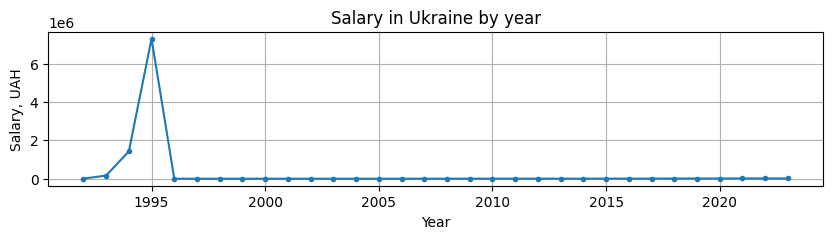

In [68]:
#13. Створюємо графік, що відображає  зарплату в Україні з часом (за роками).
plt.figure(figsize=(10,2))
plt.plot(data['Year'], data['Salary in UAH'], marker='.', linestyle='-') 
plt.title('Salary in Ukraine by year') 
plt.xlabel('Year') 
plt.ylabel('Salary, UAH') 
plt.grid(True) 
 
plt.show()

In [69]:
#14 Видаліть останній рік з таблиці та виведіть оновлену таблицю 
data = data[:-1] 
 
print("Table without last year: ") 
print(data)

Table without last year: 
    Year  Salary in UAH  Salary in USD
0   1992        5832.88          28.04
1   1993      163533.00          36.03
2   1994     1426343.00          44.99
3   1995     7304000.00          49.53
4   1996         125.23          68.45
5   1997         143.09          76.86
6   1998         152.83          62.39
7   1999         177.39          42.95
8   2000         231.04          42.47
9   2001         311.62          58.01
10  2002         375.98          70.59
11  2003         462.58          86.74
12  2004         590.53         111.02
13  2005         806.14         157.30
14  2006        1042.88         206.51
15  2007        1352.75         267.87
16  2008        1808.92         343.43
17  2009        1909.25         245.05
18  2010        2246.75         283.12
19  2011        2639.17         331.24
20  2012        3031.92         379.42
21  2013        3273.82         409.59
22  2014        3474.75         292.32
23  2015        4207.33         162.60

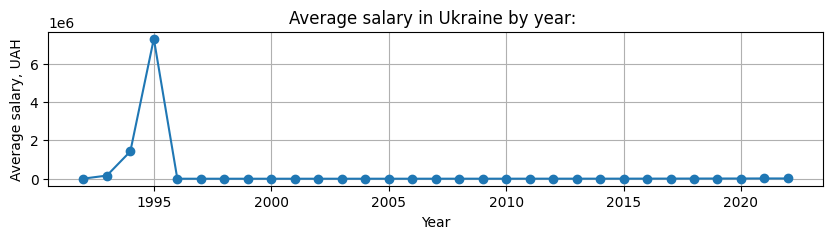

In [70]:
#15 Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року 

average_salary_by_year = data.groupby('Year')['Salary in UAH'].mean() 

plt.figure(figsize=(10, 2))
plt.plot(average_salary_by_year.index, average_salary_by_year.values, marker='o', linestyle='-') 
plt.title('Average salary in Ukraine by year: ') 
plt.xlabel('Year') 
plt.ylabel('Average salary, UAH') 
plt.grid(True) 
 
plt.show()

In [71]:
#16 Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку 

last_two_years_data = data.tail(2) 
salary_last_two_years = last_two_years_data['Salary in UAH'].sum() 
last_five_years_data = data.tail(5) 
salary_last_five_years = last_five_years_data['Salary in UAH'].sum() 
if salary_last_two_years > salary_last_five_years: 
    difference_direction = "higher" 
    difference_amount = salary_last_two_years - salary_last_five_years 
elif salary_last_two_years < salary_last_five_years: 
    difference_direction = "lower" 
    difference_amount = salary_last_five_years - salary_last_two_years 
else: 
    difference_direction = "equal" 
    difference_amount = 0 
 
print(f"Salary of the last two years: {salary_last_two_years} UAH") 
print(f"Salary of the last five years: {salary_last_five_years} UAH") 
print(f"Salary of the last two years is  {difference_amount} UAH {difference_direction} than salary of the last five years")

Salary of the last two years: 27394.01 UAH
Salary of the last five years: 58361.689999999995 UAH
Salary of the last two years is  30967.679999999997 UAH lower than salary of the last five years


Висновок: у ході виконання даної практичної роботи я працювала з табличними даними, використовуючи бібліотеки pandas, numpy та matplotlib, виконувала над ними різноманітні операції, аналізувала їх та будувала графіки на їх основі. Для ефективної роботи з даними треба було спершу привести дані до потрібного типу та очистити їх від "сміття", такого як пропуски та нечислові символи.